In [48]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import glob
from pathlib import Path
import PIL
from keras.preprocessing import image
import urllib

import matplotlib.image as mpimg
from PIL import Image


In [49]:
dictionary = {'paths_no_mask':[], 'path_img_masque': []}
mask = []
no_mask = []
columns = []


files_no_mask = os.listdir('/home/baumont/Documents/git/projet-3-groupe-2/Incorrect/')
files_mask = os.listdir('/home/baumont/Documents/git/projet-3-groupe-2/Correct/')

i = 0

for i in range (224*224):
    columns.append(f"px{i+1}")

for name in files_no_mask:
    i += 1
    dictionary['paths_no_mask'].append('/home/baumont/Documents/git/projet-3-groupe-2/Incorrect/' + name)
    img = Image.open(f'/home/baumont/Documents/git/projet-3-groupe-2/Incorrect/{name}').convert("L")
    pix = np.reshape(np.array(img, dtype='uint16'),(224*224))
    no_mask.append(pix)

for name in files_mask:
    i += 1
    dictionary['path_img_masque'].append('/home/baumont/Documents/git/projet-3-groupe-2/Correct/' + name)
    img = Image.open(f'/home/baumont/Documents/git/projet-3-groupe-2/Correct/{name}').convert("L")
    pix =  np.reshape(np.array(img, dtype='uint16'),(224*224))
    mask.append(pix)

df1 = pd.DataFrame(no_mask, columns=columns)
df2 = pd.DataFrame(mask, columns=columns)

df1['values'] = 0
df2['values'] = 1

df = pd.concat([df1, df2])
df = df.rename(columns={0: 'image path'})
df

,px1,px2,px3,px4,px5,px6,px7,px8,px9,px10,...,px50168,px50169,px50170,px50171,px50172,px50173,px50174,px50175,px50176,values
0,123,123,124,124,124,124,124,124,125,125,...,158,157,158,158,158,158,158,158,158,0
1,124,123,123,123,123,123,123,123,125,125,...,175,171,166,159,153,147,147,155,165,0
2,157,157,157,157,156,156,156,156,157,156,...,43,45,44,42,40,38,38,40,43,0
3,151,151,151,151,151,151,151,151,152,152,...,37,37,46,44,45,51,50,53,60,0
4,151,151,151,151,151,150,150,150,150,150,...,182,182,183,183,183,182,182,183,184,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,147,147,147,147,147,147,148,148,146,146,...,35,37,37,36,36,36,37,38,39,1
306,160,160,160,160,160,160,160,160,160,159,...,40,42,42,48,52,51,51,52,51,1
307,122,123,124,125,125,124,123,122,124,124,...,137,149,149,149,148,148,149,149,149,1
308,146,146,146,146,146,146,145,145,144,145,...,51,51,52,51,47,43,37,32,33,1


In [50]:
df_sampled = df.sample(frac=1)
df_sampled

,px1,px2,px3,px4,px5,px6,px7,px8,px9,px10,...,px50168,px50169,px50170,px50171,px50172,px50173,px50174,px50175,px50176,values
133,152,152,152,152,152,152,152,152,152,151,...,47,44,38,41,42,44,50,57,66,0
159,141,142,143,143,143,142,143,143,142,142,...,67,64,65,67,70,75,83,92,99,0
226,157,157,157,157,157,157,157,157,157,157,...,52,50,46,51,50,59,62,85,156,0
236,154,153,153,152,152,152,152,153,151,152,...,186,186,187,187,187,187,187,187,188,1
49,151,151,151,151,151,151,152,152,150,150,...,47,49,54,78,138,179,180,182,185,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,151,151,150,149,149,150,150,151,151,151,...,51,62,82,138,175,183,187,185,183,0
5,157,157,157,157,157,156,156,155,157,157,...,52,51,53,53,58,60,62,67,67,1
224,118,118,118,117,116,116,115,115,116,116,...,148,148,148,148,149,149,149,149,149,0
257,158,158,158,158,158,159,159,160,159,158,...,40,41,42,43,43,41,35,37,45,0


In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neural_network import MLPClassifier



In [52]:
X = df_sampled.drop(columns=['values'])
y =df_sampled['values']
X

,px1,px2,px3,px4,px5,px6,px7,px8,px9,px10,...,px50167,px50168,px50169,px50170,px50171,px50172,px50173,px50174,px50175,px50176
133,152,152,152,152,152,152,152,152,152,151,...,47,47,44,38,41,42,44,50,57,66
159,141,142,143,143,143,142,143,143,142,142,...,77,67,64,65,67,70,75,83,92,99
226,157,157,157,157,157,157,157,157,157,157,...,56,52,50,46,51,50,59,62,85,156
236,154,153,153,152,152,152,152,153,151,152,...,188,186,186,187,187,187,187,187,187,188
49,151,151,151,151,151,151,152,152,150,150,...,48,47,49,54,78,138,179,180,182,185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,151,151,150,149,149,150,150,151,151,151,...,51,51,62,82,138,175,183,187,185,183
5,157,157,157,157,157,156,156,155,157,157,...,52,52,51,53,53,58,60,62,67,67
224,118,118,118,117,116,116,115,115,116,116,...,148,148,148,148,148,149,149,149,149,149
257,158,158,158,158,158,159,159,160,159,158,...,39,40,41,42,43,43,41,35,37,45


In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
RF = RandomForestClassifier(n_estimators=500, max_depth=10, random_state=0).fit(X_train, y_train)
pred = RF.predict(X_test)
print("score train : ",RF.score(X_train, y_train))
print("score test : ",RF.score(X_test, y_test))

score train :  1.0
score test :  0.9317073170731708


In [54]:
pred

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0])

In [55]:
y_test

167    1
90     0
263    1
206    0
11     1
      ..
272    1
113    1
279    0
228    1
177    1
Name: values, Length: 205, dtype: int64

In [56]:
# plt.imshow(np.reshape(np.array(X_test.iloc[135]),(224,224)))

In [57]:
np.where(pred != y_test)

(array([  3,  30,  47,  56,  91,  98, 122, 127, 147, 164, 166, 192, 195,
        204]),)

In [58]:
y_test[10]

10    0
10    1
Name: values, dtype: int64

IndexError: index 50795 is out of bounds for axis 0 with size 12

In [59]:
pred

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0])

In [ ]:
idx

7

TypeError: 'function' object is not subscriptable

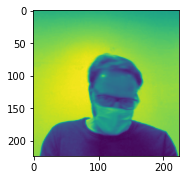

In [ ]:
plt.figure(figsize=(12, 10))
for i in range(6):
    idx = np.where(y_test != pred)[0][i]
    ax = plt.subplot(3, 4, i + 1)
    plt.imshow(np.reshape(np.array(X_test.iloc[34]),(224,224)))
    plt.imshow(X_test.iloc[idx](np.reshape[224,224]))
    plt.title(f"predicted: {[pred[idx]]}\ntrue: {[y_test[idx]]}")
    plt.axis("off")

In [ ]:
plt.figure(figsize=(12, 10))
for i in range(10):
    idx = np.where(y_test != pred)[0][i]
    ax = plt.subplot(3, 4, i + 1)
    plt.imshow(np.reshape(np.array(X_test.loc[idx])),(224,224)))
    plt.title(f"predicted: {[pred[idx]]}\ntrue: {[y_test[idx]]}")
    plt.axis("off")

SyntaxError: unmatched ')' (3998611722.py, line 5)

In [19]:
!pipenv install seaborn

Courtesy Notice: Pipenv found itself running within a virtual environment, so it will automatically use that environment, instead of creating its own for any project. You can set PIPENV_IGNORE_VIRTUALENVS=1 to force pipenv to ignore that environment and create its own instead. You can set PIPENV_VERBOSITY=-1 to suppress this warning.
Installing seaborn...
Adding seaborn to Pipfile's [packages]...
✔ Installation Succeeded 
Pipfile.lock (356b2e) out of date, updating to (86192a)...
Locking [dev-packages] dependencies...
Building requirements...
Resolving dependencies...
✔ Success! 
Locking [packages] dependencies...
Building requirements...
Resolving dependencies...
✔ Success! 
Updated Pipfile.lock (86192a)!
Installing dependencies from Pipfile.lock (86192a)...
  🐍   ▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉ 7/7 — 00:00:01
To activate this project's virtualenv, run pipenv shell.
Alternatively, run a command inside the virtualenv with pipenv run.


resultat detection du mask model RF


<AxesSubplot:>

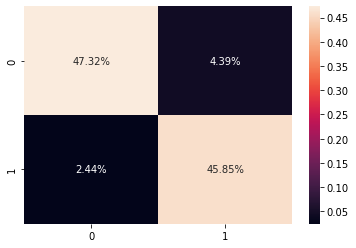

In [60]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns

print("resultat detection du mask model RF")
cm = confusion_matrix(y_test, RF.predict(X_test))
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%')

In [61]:
print(classification_report(y_test, RF.predict(X_test)))

              precision    recall  f1-score   support

           0       0.95      0.92      0.93       106
           1       0.91      0.95      0.93        99

    accuracy                           0.93       205
   macro avg       0.93      0.93      0.93       205
weighted avg       0.93      0.93      0.93       205



In [62]:
SVM = svm.SVC(decision_function_shape="ovo").fit(X_train, y_train)

print('Score train svm ',SVM.score(X_train, y_train))
print('Score test svm ',SVM.score(X_test, y_test))

Score train svm  0.8602409638554217
Score test svm  0.7658536585365854


resultat detection du mask model SVM


<AxesSubplot:>

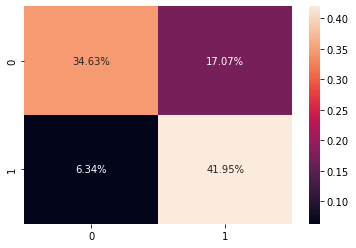

In [63]:
print("resultat detection du mask model SVM")
cm = confusion_matrix(y_test, SVM.predict(X_test))
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%')


In [64]:
print(confusion_matrix(y_test, SVM.predict(X_test)))
print(classification_report(y_test, SVM.predict(X_test)))

[[71 35]
 [13 86]]
              precision    recall  f1-score   support

           0       0.85      0.67      0.75       106
           1       0.71      0.87      0.78        99

    accuracy                           0.77       205
   macro avg       0.78      0.77      0.76       205
weighted avg       0.78      0.77      0.76       205



In [65]:
NN = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)
print('score train', NN.score(X_train, y_train))
print('score test Nn', NN.score(X_test, y_test), 4)

score train 0.5108433734939759
score test Nn 0.5365853658536586 4


resultat detection du mask model MLPClassifier


<AxesSubplot:>

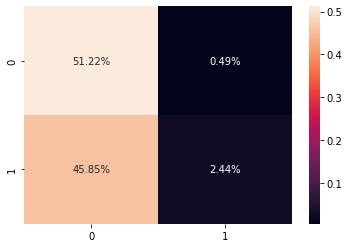

In [66]:
print("resultat detection du mask model MLPClassifier")
cm = confusion_matrix(y_test, NN.predict(X_test))
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%')



In [67]:
print(confusion_matrix(y_test, NN.predict(X_test)))
print(classification_report(y_test, NN.predict(X_test)))

[[105   1]
 [ 94   5]]
              precision    recall  f1-score   support

           0       0.53      0.99      0.69       106
           1       0.83      0.05      0.10        99

    accuracy                           0.54       205
   macro avg       0.68      0.52      0.39       205
weighted avg       0.68      0.54      0.40       205

